$$\textbf{Optimización I. Tarea 9}$$
$$\textit{Y. Sarahi García Gozález}$$

$\color{purple}{Librerías \space }$ <br>

In [1]:
import numpy as np
import functions as fn #libreria con las funciones Himmelblau,Beale,Rosenbrock,Hartman
from math import exp
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd

import matplotlib.pyplot as plt


In [2]:
#imprimimos el epsilon de la máquina
epsilon = np.finfo(float).eps
print("Epsilon de la máquina:", epsilon)

Epsilon de la máquina: 2.220446049250313e-16


In [7]:
def imprime(metodo,metodo_args):

    '''
    Esta función imprime:
    - f((x_k)
    - el  número $k$ de iteraciones realizadas
    - f(x_k)
    - la norma de p_k, 

    '''

    xk, fk,pk, k, indicador= metodo(*metodo_args)


    print('z_k= ', xk )
    print('f(x_0) = ', fk )
    print('Número de iteraciones = ', k )
    print('Norma del p ||pk||   = ', np.linalg.norm(pk))



    if(indicador):
        print("Sí se cumplio el criterio de convergencia")

    return xk


In [36]:
#definimos la funcion que genera la matriz A de acuerdo a la instrucción anterior
def genera_A1(n):
    return np.ones((n,n))+n*np.eye(n)
#definimos la funcion que genera la matriz A de acuerdo a la instrucción anterior
def genera_A2(n):
    A = np.empty([n,n], dtype=float)
    for i in range(n):
        for j in range(n):
            u=0.25*((i-j)**2)
            A[i][j]=exp(-1*u)
    return A

In [16]:
# Lectura de los datos
data = pd.read_csv('heart.csv')
print('Dimensiones de la tabla:', data.shape)
data.head()

Dimensiones de la tabla: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# Cambiamos la etiqueta 0 por -1
data.loc[data['target']==0, 'target'] = -1
# Vector de etiquetas
y  = data["target"]

# Matriz de datos
X  = data.drop('target',axis=1)

# Se usa el 20% de los datos para crear el conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# Se estandariza cada columna de la matriz de datos para evitar que por tener diferentes
# rangos de valores cada columna (variable), afecte al algoritmo de optimización
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Número de muestras del conjunto de entrenamiento
ntrain  = X_train.shape[0]
# Se agrega una columna de 1's para que el bias b forme pare del vector w
X_train = np.hstack((np.ones((ntrain,1)), X_train))

# Número de muestras del conjunto de prueba
ntest   = X_test.shape[0]
# Se agrega una columna de 1's para que el bias b forme pare del vector w
X_test  = np.hstack((np.ones((ntest,1)), X_test))

# Se convierte los dataframes a una matriz de numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Se entrena el clasificador de regresión logística
lr    = LogisticRegression(fit_intercept=False)
model = lr.fit(X_train, y_train)

# Imprimimos las componentes de w
w = np.squeeze(model.coef_)
print('w = ')
print(w)

# Se calcula las predicciones para el conjunto de prueba
y_predict = model.predict(X_test)

w = 
[ 0.11505553 -0.07527989 -0.86343872  0.79668329 -0.19306509 -0.24740666
 -0.13375708  0.09199133  0.5056945  -0.47893713 -0.64523259  0.13478362
 -0.88420603 -0.46002338]



Accuracy: 0.8360655737704918 



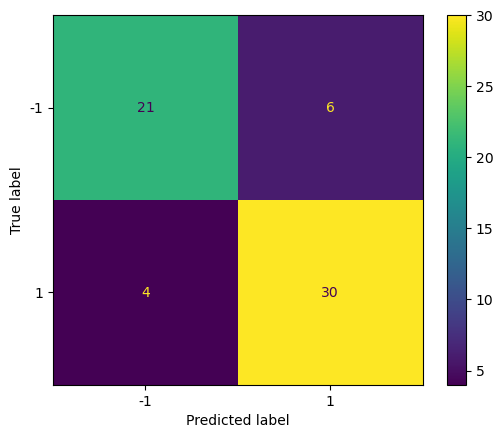

In [19]:
# Se mide el desempeño calculando la matriz de confusión y la exactitud
conf_matrix = confusion_matrix(y_test, y_predict)
acc_score = accuracy_score(y_test, y_predict)
print("\nAccuracy:", acc_score,'\n')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model.classes_)
disp.plot()

$\color{purple}{Ejercicio \space 1}$ <br>

1. Muestre que el gradiente de $L(\mathbf{w})$ está dado por

$$ \nabla_w L(\mathbf{w}) = - \sum_{i=1}^m (1 - \sigma(\mathbf{x}_i, y_i, \mathbf{w})) y_i\mathbf{x}_i
+ \lambda \mathbf{w}. $$

![Ejercicio 1a](1a.jpg)


2. Programar las funciones

$$\sigma(\mathbf{X}, \mathbf{y}, \mathbf{w}), \quad
L(\mathbf{w})\quad \text{y} \quad \nabla_w L(\mathbf{w}).$$

In [51]:
def sigmoid(X, y, w):  
    sig = []
    for i in range(len(y)):
        z = np.dot(X[i] ,w) * y[i]
        sig.append(1 / (1 + np.exp(-z)))
    return np.array(sig)

def L(X, y, w, l): 
    inversos = np.reciprocal(sigmoid(X, y, w))
    s = np.sum(inversos)
    return s + l * np.dot(w, w) / 2

def D_L(X, y, w, l):
    a=1-sigmoid(X, y, w)
    a=X.T*a
    a=a*y
    a=a.T
    s=np.sum(a,axis=0)
    
    return s+l*w

In [70]:
# Función para predecir la clase de cada dato (fila) en la matriz X
# Devuelve un arreglo del tamaño de la cantidad de filas de X que tiene
# las etiquetas -1 o 1  que se predicen para cada dato.
# Para calcular las etiquetas, se calcula el vector que tiene las probabilidades
# de que los datos pertenezcan a la clase 1. Si la probabilidad es mayor que 0.5,
# se asigna la clase 1. En caso contrario se asigna la clase -1.
#
def predict(X, w):
    # Vector de prediciones. Se inicializa como si todas las etiquetas fueran 1
    y_pred = np.ones(X.shape[0])
    # Vector de probalidades de que los datos pertenezcan a la clase 1
    vprob  = sigmoid(X, np.ones(X.shape[0]), w)
    # Se obtienen los índices de los datos que tienen una probabilidad menor a 0.5
    ii     = np.where(vprob<=0.5)[0]
    # Se cambia la etiqueta por -1 para todos los datos con probabilidad menor a 0.5
    y_pred[ii] = -1
    return y_pred

3. Aplique el método de descenso máximo para minimizar la función $L(\mathbf{w})$.

In [82]:

def backtracking(alpha_ini,x_k,f,f_k,df,p_k,rho=0.5,c=0.001,iter_max=500):

    '''
        Esta funcion parte de un tamaño de paso inicial alpha_ini y lo va recortando hasta que
        cumple la cond de descenso suficiente

        parametros:
            valores (float): alpha_ini, rho entre (0,1), f(x_k), Df(x_k) (gradiente en el punto x_k), c_1, 
            direccion de descenso (np.rray): p_k 

        returns:
            el tamaño de paso a_k
            numero de iteraciones realizadas i_k
    '''

    alpha=alpha_ini #fijamos alpha como el alpha inicial
     
    for i in range(iter_max):
        x_kp=x_k+alpha*p_k
        gp=c*np.dot(df(x_k),p_k) #hacemos el producto gradiente por direccion de descenso p
    

        #si la condicion de descenso se cumple, terminamos
        if f(x_kp)<=(f_k + alpha*gp):
            return alpha,i,True

        alpha=alpha*rho #si no se cumple la cond, hacemos alpha*rho
     
    return  alpha,iter_max,False

def descenso_maximo_backtracking(f,df,x0,alpha_ini,tau,rho=0.5,c=0.001,max_iter=500,max_iter_b=500):
    '''
    Esta funcion busca el minimo de la funcion f usando la tecnica de backtracking

    Parametros: 
        f: función a optimizar
        df: gradiente de f
        x_0: valor inicial
        tau,N: tolerancia y numero maximo de iteraciones (descenso)
        parametros de 

        NOTA:los argumentos predeterminados son específicos para este ejercicio y n=2
    
    returns:
        x_k: ultimo punto de la sucesión que genera el algoritmo

        
    '''
    n=len(x0)
    x_k=x0

    f_k=f(x_k)
    df_k=df(x_k)


    for k in range(max_iter):
        #calculmos pk y ak
        p_k=-df_k
        a_k,i,ind=backtracking(alpha_ini,x_k,f,f_k,df,p_k)
   
        if not ind:
            print('Insuficientes iteraciones Backtracking', a_k)

        x_k=x_k+(a_k*p_k)
        

        if np.linalg.norm(a_k*p_k)<tau:#si se cumple la cond
            break #y romepos el ciclo

        f_k=f(x_k)
        df_k=df(x_k)

        
    
    print("Iteraciones: ",k)
    return x_k

4. Pruebe el algoritmo de optimización usando $\mathbf{w}_0=(1,1,...,1)$,  el
   número de iteraciones máximas $N=500$, la tolerancia para terminar el algoritmo
   $\tau = \sqrt{ntrain}\epsilon_m^{1/3}$ y para el algoritmo de backtracking
   $\rho = 0.5, c_1 = 0.001$ $N_b=500$.
   

In [83]:
len(X_train[0])

14

$\lambda=0.001$

In [84]:
n=len(X_train[0])
w0 = np.ones(n)
l = 0.001
tol = np.sqrt(n)*(epsilon**(1/3))

w =descenso_maximo_backtracking(lambda w: L(X_train, y_train, w,l), lambda w: D_L( X_train, y_train,w, l), w0,1, tol)



Iteraciones:  33


In [87]:
#el vector w, obtenido
w

array([ 0.11145807, -0.06877469, -0.9333905 ,  0.85046155, -0.20271416,
       -0.28170029, -0.1497635 ,  0.09650942,  0.53729735, -0.49273852,
       -0.69145085,  0.12941124, -0.93948782, -0.48498889])

In [81]:
y_predict = predict(X_test, w)


Accuracy: 0.8524590163934426 



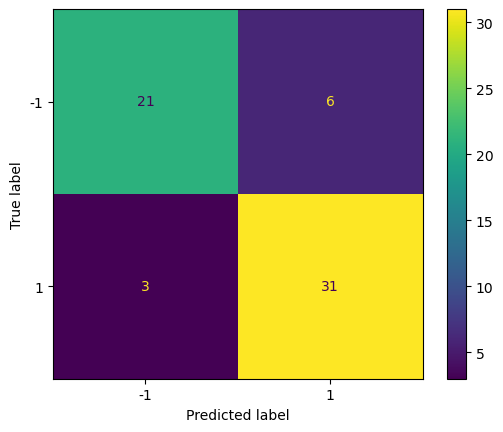

In [86]:
conf_matrix = confusion_matrix(y_test, y_predict)
acc_score = accuracy_score(y_test, y_predict)
print("\nAccuracy:", acc_score,'\n')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model.classes_)
disp.plot()

$\lambda=1.0$

In [88]:
n=len(X_train[0])
w0 = np.ones(n)
l = 1.0
tol = np.sqrt(n)*(epsilon**(1.0/3.0))

w =descenso_maximo_backtracking(lambda w: L(X_train, y_train, w,l), lambda w: D_L( X_train, y_train,w, l), w0,1, tol)


Iteraciones:  36


In [89]:
#el vector w, obtenido
w

array([ 0.11473076, -0.07510326, -0.86333463,  0.79656058, -0.19297139,
       -0.24737634, -0.13382403,  0.09216929,  0.50578837, -0.4786865 ,
       -0.64593817,  0.13433682, -0.88456275, -0.45989822])

In [90]:
y_predict = predict(X_test, w)


Accuracy: 0.8360655737704918 



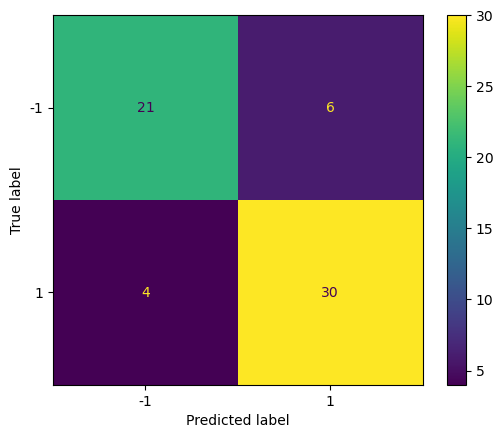

In [91]:
conf_matrix = confusion_matrix(y_test, y_predict)
acc_score = accuracy_score(y_test, y_predict)
print("\nAccuracy:", acc_score,'\n')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=model.classes_)
disp.plot()

$\color{purple}{Ejercicio \space 2}$ <br>

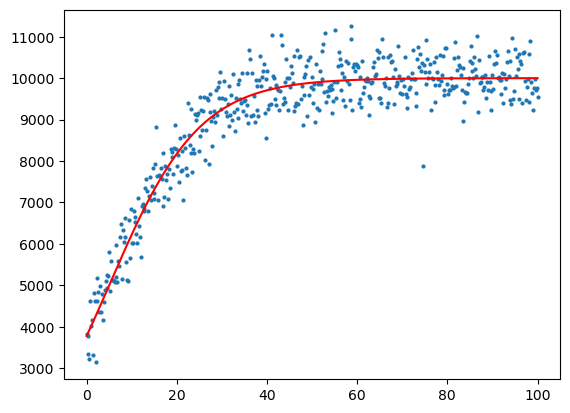

In [3]:
def fnc_h(t, N_max, r, t0):
    return N_max / (1 + np.exp(-r * (t - t0)))

m = 500
rnd_scale = 5e2
params_hat = (N_max_hat, r_hat, t0_hat) = (1e4, 0.1, 5)
T = np.linspace(0, 100, m)
np.random.seed()
Y = fnc_h(T, *params_hat) + rnd_scale * np.random.randn(m)

plt.plot(T, Y, 'o', markersize=2)
plt.plot(T, fnc_h(T, *params_hat), 'r')

1. Programe el método de Gauss-Newton de acuerdo con Algoritmo 1 de la Clase 26.
   Haga que la función devuelva el último punto $\mathbf{z}_k$,
   el vector $\mathbf{p}_k$ y el número de iteraciones $k$ realizadas.



In [12]:
def backtracking1(alpha_ini,x_k,f,f_k,df_k,p_k,rho=0.5,c=0.001,iter_max=500):

    '''
        modificamos ligeramente el backtracking anterior
        para no utilizar Df como función y usar Df_k 
    '''

    alpha=alpha_ini #fijamos alpha como el alpha inicial
    for i in range(iter_max):
      # condicion de descenso suficiente
        if f(x_k+alpha*p_k)<= f(x_k) + c*alpha*(np.dot(df_k, p_k)):
          return alpha
        alpha=rho*alpha#si no se cumple la cond, hacemos alpha*rho     
    return  alpha

# Método de Gauss-Newton
def gauss_newton(f, R, J, x0,alpha_ini,tol,max_iter=1000):
  
  x_k = x0
  alpha_k = alpha_ini

  for k in range(max_iter):
    R_k = R(x_k)
    J_k = J(x_k)

    f_k = f(x_k)
    df_k = (J_k.T)@R_k
    p_k = np.linalg.solve((J_k.T)@J_k, -df_k)

    if np.linalg.norm(p_k) < tol:
      return x_k, f_k,p_k, k+1, True
    
    alpha_k = backtracking1(alpha_ini,x_k,f,f_k,df_k,p_k)

    x_k = x_k + alpha_k*p_k


  return x_k,f_k, p_k, max_iter, False

2. Programe las funciones  $\mathbf{R}(\mathbf{z})$, $f(\mathbf{z})$ y
   la función que calcula matriz Jacobiana $\mathbf{J}(\mathbf{z})$ de $\mathbf{R}(\mathbf{z})$
   para el modelo $h(t_i; N_{max}, r, t_0)$.


In [9]:
def R(z, T, Y):
  n = len(T)
  #inicializamos en ceros
  r = np.zeros(n)
  for i in range(n): 
    r[i] = fnc_h(T[i], z[0], z[1], z[2]) - Y[i]
  return r

def J(z, T):
  #inicializamos en ceros
  jacobiana = np.zeros([len(T), 3]) 
  #rellenamos 
  for i in range(len(T)):
    e = np.exp(-z[1]*(T[i]-z[1]))
    jacobiana[i][0]=1/(1+e)
    jacobiana[i][1]=z[0]*(T[i]-z[1])*e/(1+e)**2
    jacobiana[i][2]=-z[0]*z[1]*e/(1+e)**2
  return jacobiana

def f(z, T, Y): 
  r = R(z, T, Y)
  return np.dot(r, r)/2.0

3. Aplique el método de Gauss-Newton partiendo del punto inicial
   $\mathbf{z}_0 = (1000, 0.2, 0)$, una tolerancia $\tau=\epsilon_m^{1/3}$
   
   Imprima el punto $\mathbf{z}_k$ que devuelve el algoritmo, el valor
   $f(\mathbf{z}_k)$, el número de iteraciones $k$ realizadas y la norma de $\mathbf{p}_k$.
   


In [13]:
z0 = np.array([1000.0, 0.2, 0.0])
tol = epsilon**(1/3)
alpha_ini=1
argumentos=[lambda z: f(z, T, Y), lambda z: R(z, T, Y), lambda z: J(z, T), z0,alpha_ini,tol]
z1=imprime(gauss_newton,argumentos)

z_k=  [9.76883824e+03 2.90460075e-01 4.00969877e+01]
f(x_0) =  5481385729.759441
Número de iteraciones =  1000
Norma del p ||pk||   =  2731.428471331816



   
4. Grafique los datos y la curva del modelo usando los valores del punto inicial
   $\mathbf{z}_0$ y del punto $\mathbf{z}_k$ que devuelve el algoritmo, como lo hicieron en
   la ayudantía.

[]

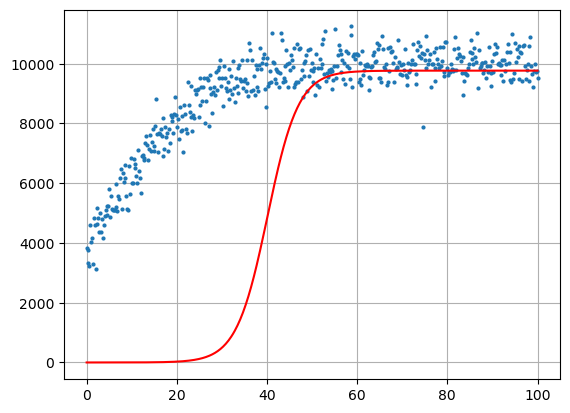

In [14]:
plt.plot(T, Y, 'o', markersize=2)
plt.plot(T, fnc_h(T, z1[0], z1[1], z1[2]),'r')
plt.grid()
plt.plot()

No sé porque mi algoritmo no converge a la solución, revisé todo varias veces y creo que está bien. Traté moviendo algunos parámetros pero no se acerca lo suficiente :(

No se queda muy lejos, pero aunque aumente el numero de iteraciones queda igual,l aunqur está cerca del valor con que se generaron los datos z_sol=[$9.6\times10^3$,$0.2$,$3.6$]